<a href="https://colab.research.google.com/github/Lorenaps/educacao-brasileira/blob/main/cadernos/lab_politicas_publicas_cidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

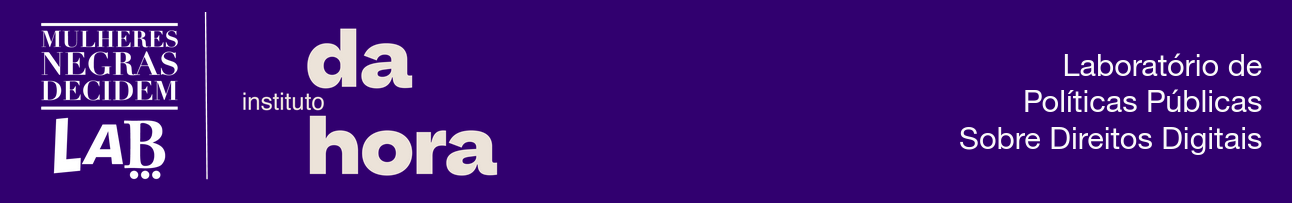

# Laboratório de Políticas Públicas

> Esse caderno de análises foi construído para o 2º encontro do [Laboratório de Políticas Públicas Sobre Direitos Digitais](https://www.instagram.com/reel/CsmhUdMg5hF/?utm_source=ig_web_copy_link&igshid=MzRlODBiNWFlZA%3D%3D) ministrado por Lorena Pereira. O Lab é um projeto das organizações [Mulheres Negras Decidem](https://www.instagram.com/mulheresnegrasdecidem/) & [Instituto da Hora](https://www.instagram.com/instituto_dahora/).  
E nesse encontro iremos experimentar o processo de construção de análises sobre os dados educaionais brasileiros.

### Instruções de uso:
- Fazer uma cópia da base de dados utilizada, que está disponível [nesse arquivo de dados.](https://drive.google.com/file/d/1GXebo6uN3CilaysVjEOyfmEpLDpsU5LF/view?usp=share_link)
- Como de tratam de dados governamentais abertos, é recomendado, para facilitar a execução do código aqui apresentado, o uso da plataforma [*Colaboratory*](https://colab.research.google.com/), que pode ser usada direto do navegador sem ter que fazer instalações adicionais da linguagem de programação Python ou da biblioteca Pandas.
  - Em caso de usar a plataforma *Colaboratory*, recomenda-se fazer a copia do [arquivo de dados](https://drive.google.com/file/d/1GXebo6uN3CilaysVjEOyfmEpLDpsU5LF/view?usp=share_link) direto no Google Drive e habilitar que o *Colaboratory* possa acessar o arquivo diretamente.



*Trazendo as ferramentas necessárias*

In [1]:
import pandas as pd
import altair as alt
from altair.vegalite import Tooltip


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Importando a base de dados do censo que comprreende os anos de 2007 até 2022.*

> Os dados foram unificados anteriormente [nesse caderno](https://github.com/Lorenaps/educacao-brasileira/blob/main/etl/censo_escolar.ipynb).

In [3]:
%%time

censo = pd.read_csv('/content/drive/MyDrive/dados/output/baseCensoEscolar_230524.csv', encoding='utf-8')
censo.head(3)

CPU times: user 18.7 s, sys: 8.75 s, total: 27.4 s
Wall time: 34.1 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,IN_BAS,IN_INF,IN_INF_CRE,IN_INF_PRE,IN_FUND,IN_FUND_AI,IN_FUND_AF,IN_MED,IN_PROF,IN_PROF_TEC,IN_EJA,IN_EJA_FUND,IN_EJA_MED,IN_ESP,IN_ESP_CC,IN_ESP_CE,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EIEEF HAP BITT TUPARI,11022558,2,NaN,2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,CEEJA LUIZ VAZ DE CAMOES,11024275,2,NaN,1,0.0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,200.0,3.0,114.0,86.0,0.0,53.0,5.0,132.0,0.0,10.0,15.0,0.0,0.0,0.0,10.0,0.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMMEF 7 DE SETEMBRO,11024291,3,NaN,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [4]:
len(censo)

3625294

# Importando uma base de dados reduzida!

In [5]:
%%time

censo = pd.read_csv('/content/dados_cidades_nordeste.csv', encoding='utf-8')
censo.head(3)

CPU times: user 254 ms, sys: 0 ns, total: 254 ms
Wall time: 259 ms


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,IN_BAS,IN_INF,IN_INF_CRE,IN_INF_PRE,IN_FUND,IN_FUND_AI,IN_FUND_AF,IN_MED,IN_PROF,IN_PROF_TEC,IN_EJA,IN_EJA_FUND,IN_EJA_MED,IN_ESP,IN_ESP_CC,IN_ESP_CE,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Nordeste,2,Rio Grande do Norte,RN,24,Caicó,Central Potiguar,Seridó Ocidental,CEJA SENADOR GUERRA,24031313,2,NaN,1,0.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,388.0,0.0,0.0,0.0,0.0,0.0,388.0,9.0,160.0,228.0,175.0,110.0,7.0,96.0,0.0,0.0,31.0,0.0,0.0,0.0,27.0,0.0,0.0
1,2022,Nordeste,2,Rio Grande do Norte,RN,24,Caicó,Central Potiguar,Seridó Ocidental,CENTRO DE PROM SOC STO ESTEVAO DIACONO,24031321,4,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Nordeste,2,Rio Grande do Norte,RN,24,Caicó,Central Potiguar,Seridó Ocidental,CE JOSE AUGUSTO,24031348,2,NaN,1,0.0,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,187.0,0.0,0.0,187.0,0.0,0.0,0.0,7.0,103.0,84.0,10.0,133.0,4.0,40.0,0.0,0.0,13.0,0.0,0.0,13.0,6.0,0.0,6.0


In [6]:
len(censo)

62561

## O tamanho dos arquivos é um fator muito importante na análise de dados!

# Vamos seguir agora explorando as colunas existentes...

In [7]:
censo.columns

Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'NO_MESORREGIAO', 'NO_MICRORREGIAO', 'NO_ENTIDADE',
       'CO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
       'TP_SITUACAO_FUNCIONAMENTO', 'IN_INTERNET', 'IN_INTERNET_ALUNOS',
       'IN_INTERNET_ADMINISTRATIVO', 'IN_INTERNET_APRENDIZAGEM',
       'IN_INTERNET_COMUNIDADE', 'IN_ACESSO_INTERNET_COMPUTADOR',
       'IN_ACES_INTERNET_DISP_PESSOAIS', 'TP_REDE_LOCAL', 'IN_BANDA_LARGA',
       'IN_BAS', 'IN_INF', 'IN_INF_CRE', 'IN_INF_PRE', 'IN_FUND', 'IN_FUND_AI',
       'IN_FUND_AF', 'IN_MED', 'IN_PROF', 'IN_PROF_TEC', 'IN_EJA',
       'IN_EJA_FUND', 'IN_EJA_MED', 'IN_ESP', 'IN_ESP_CC', 'IN_ESP_CE',
       'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF',
       'QT_MAT_PROF_TEC', 'QT_MAT_EJA', 'QT_MAT_ESP', 'QT_MAT_BAS_FEM',
       'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA',
       '

De acordo ao Dicionário de Dados disponível no conjunto de dados do Censo Escolar 2022 do INEP, algumas colunas que podem nos ajudar a entender melhor esse contexto são:

- **TP_DEPENDENCIA**: Que descreve a Dependência Administrativa e tem como referência os valores (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada);  

- **TP_LOCALIZACAO**: Indica se a escola está localizada em zona urbana ou rual (1 - Urbana, 2 - Rural);  

- **QT_MAT_BAS**: Que descreve o Número de Matrículas na Educação Básica;  

- **IN_BAS**: Que descreve se existe uma ou mais matrículas para Educação Básica (0 - Não, 1 - Sim);  

- **TP_SITUACAO_FUNCIONAMENTO**: Situação de funcionamento (1 - Em Atividade, 2 - Paralisada, 3 - Extinta (ano do Censo), 4 - Extinta em Anos Anteriores);  

- **IN_INTERNET**: Se existe acesso a Internet (0 - Não, 1 - Sim);  

*Filtrando os registros do censo que tratam das escolas ativas e que possuem 1 ou mais matrículas na Educação Básica e subsitituindo os códigos descritores:*

In [9]:
dados = censo.loc[(censo['TP_SITUACAO_FUNCIONAMENTO'] == 1) & (censo['IN_BAS'] == 1)]

dados.loc[dados['TP_DEPENDENCIA'] == 1, ['TP_DEPENDENCIA']] = 'Federal'
dados.loc[dados['TP_DEPENDENCIA'] == 2, ['TP_DEPENDENCIA']] = 'Estadual'
dados.loc[dados['TP_DEPENDENCIA'] == 3, ['TP_DEPENDENCIA']] = 'Municipal'
dados.loc[dados['TP_DEPENDENCIA'] == 4, ['TP_DEPENDENCIA']] = 'Privada'

dados.loc[dados['TP_LOCALIZACAO'] == 1, ['TP_LOCALIZACAO']] = 'Urbana'
dados.loc[dados['TP_LOCALIZACAO'] == 2, ['TP_LOCALIZACAO']] = 'Rural'

dados.loc[dados['IN_INTERNET'] == 1.0, ['IN_INTERNET']] = 'Sim'
dados.loc[dados['IN_INTERNET'] == 0.0, ['IN_INTERNET']] = 'Não'

## Vamos para as nossas perguntas:

### 1. Como se dividem as matrículas por dependência administrativa?

In [10]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS']]
analise.head(5)

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,388.0
2,Estadual,187.0
3,Privada,887.0
4,Municipal,14.0
5,Municipal,18.0


In [11]:
analise = analise.groupby(['TP_DEPENDENCIA']).sum().reset_index()
analise

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,7955729.0
1,Federal,170754.0
2,Municipal,5259814.0
3,Privada,5640533.0


In [12]:
analise = analise.sort_values('QT_MAT_BAS', ascending=False)
analise

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,7955729.0
3,Privada,5640533.0
2,Municipal,5259814.0
1,Federal,170754.0


In [13]:
analise = analise.style.format({"QT_MAT_BAS": "{:,}"})
analise

,TP_DEPENDENCIA,QT_MAT_BAS
0,Estadual,"7,955,729.0"
3,Privada,"5,640,533.0"
2,Municipal,"5,259,814.0"
1,Federal,"170,754.0"


In [16]:
analise = dados.loc[dados['NU_ANO_CENSO'] == 2022][['TP_DEPENDENCIA', 'QT_MAT_BAS']]
analise.groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False).style.format({"QT_MAT_BAS": "{:,}"})

,TP_DEPENDENCIA,QT_MAT_BAS
3,Privada,"382,488.0"
0,Estadual,"368,626.0"
2,Municipal,"330,552.0"
1,Federal,"10,801.0"


In [18]:
dados.columns

Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'NO_MESORREGIAO', 'NO_MICRORREGIAO', 'NO_ENTIDADE',
       'CO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
       'TP_SITUACAO_FUNCIONAMENTO', 'IN_INTERNET', 'IN_INTERNET_ALUNOS',
       'IN_INTERNET_ADMINISTRATIVO', 'IN_INTERNET_APRENDIZAGEM',
       'IN_INTERNET_COMUNIDADE', 'IN_ACESSO_INTERNET_COMPUTADOR',
       'IN_ACES_INTERNET_DISP_PESSOAIS', 'TP_REDE_LOCAL', 'IN_BANDA_LARGA',
       'IN_BAS', 'IN_INF', 'IN_INF_CRE', 'IN_INF_PRE', 'IN_FUND', 'IN_FUND_AI',
       'IN_FUND_AF', 'IN_MED', 'IN_PROF', 'IN_PROF_TEC', 'IN_EJA',
       'IN_EJA_FUND', 'IN_EJA_MED', 'IN_ESP', 'IN_ESP_CC', 'IN_ESP_CE',
       'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF',
       'QT_MAT_PROF_TEC', 'QT_MAT_EJA', 'QT_MAT_ESP', 'QT_MAT_BAS_FEM',
       'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA',
       '

In [20]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO']]
analise = analise.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values(['NU_ANO_CENSO', \
                                                                             'QT_MAT_BAS'], ascending=False)
analise

,TP_DEPENDENCIA,NU_ANO_CENSO,QT_MAT_BAS
63,Privada,2022,382488.0
15,Estadual,2022,368626.0
47,Municipal,2022,330552.0
31,Federal,2022,10801.0
14,Estadual,2021,411677.0
62,Privada,2021,342392.0
46,Municipal,2021,329406.0
30,Federal,2021,11156.0
13,Estadual,2020,410489.0
61,Privada,2020,374486.0


In [21]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Ano'),
    y = alt.Y('QT_MAT_BAS', title='Matrículas'),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).properties(
width=500,
height=500
).interactive()

alt.Chart(...)

### 2.   Como se dividem as escolas por dependência administrativa?

In [22]:
analise = dados[['TP_DEPENDENCIA', 'CO_ENTIDADE', 'NU_ANO_CENSO']]
analise = analise.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})
analise.sort_values(['NU_ANO_CENSO', 'QTD_ESCOLA'], ascending=False).style.format({"QTD_ESCOLA": "{:,}"})

,TP_DEPENDENCIA,NU_ANO_CENSO,QTD_ESCOLA
63,Privada,2022,"1,702"
47,Municipal,2022,"1,135"
15,Estadual,2022,465
31,Federal,2022,9
62,Privada,2021,"1,727"
46,Municipal,2021,"1,126"
14,Estadual,2021,478
30,Federal,2021,9
61,Privada,2020,"1,695"
45,Municipal,2020,"1,125"


In [23]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Ano'),
    y = alt.Y('QTD_ESCOLA', title='Quantidade de escolas'),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).properties(
width=500,
height=500
).interactive()

alt.Chart(...)

### 3. Como podemos expandir essa análise para os territórios?

In [25]:
analise = dados.loc[dados['NU_ANO_CENSO'] == 2022][['QT_MAT_BAS', 'NO_MUNICIPIO']]
analise.groupby(['NO_MUNICIPIO']).sum().reset_index().sort_values(['QT_MAT_BAS'], ascending=False).style.format({"QT_MAT_BAS": "{:,}"})

,NO_MUNICIPIO,QT_MAT_BAS
4,Salvador,"492,729.0"
3,Recife,"356,999.0"
2,Feira de Santana,"134,924.0"
1,Campina Grande,"93,404.0"
0,Caicó,"14,411.0"


In [26]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO', 'NO_MUNICIPIO']]
analise = analise.groupby(['TP_DEPENDENCIA', \
                           'NU_ANO_CENSO', \
                           'NO_MUNICIPIO']).sum().reset_index().sort_values(['QT_MAT_BAS'], ascending=False)

In [32]:
salvador = analise.loc[analise['NO_MUNICIPIO'] == 'Salvador']
recife = analise.loc[analise['NO_MUNICIPIO'] == 'Recife']
feira = analise.loc[analise['NO_MUNICIPIO'] == 'Feira de Santana']
campina = analise.loc[analise['NO_MUNICIPIO'] == 'Campina Grande']
caico = analise.loc[analise['NO_MUNICIPIO'] == 'Caicó']

titulo = 'Matrículas'

g1 = alt.Chart(salvador).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Salvador'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 400000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

g2 = alt.Chart(recife).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Recife'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 400000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

g3 = alt.Chart(feira).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Feira de Santana'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 400000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

g4 = alt.Chart(campina).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Campina Grande'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 400000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

g5 = alt.Chart(caico).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Caicó'),
    y = alt.Y('QT_MAT_BAS', title=titulo, scale={'domain': (0, 400000)}),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

g1 | g2 | g3 | g4 | g5

alt.HConcatChart(...)

### Olhando as cidades em separado

In [33]:
analise = dados[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO', 'NO_MUNICIPIO']]
analise = analise.groupby(['TP_DEPENDENCIA', \
                           'NU_ANO_CENSO', \
                           'NO_MUNICIPIO']).sum().reset_index().sort_values(['NO_MUNICIPIO', \
                                                                      'NU_ANO_CENSO', \
                                                                      'QT_MAT_BAS'], ascending=False)

In [34]:
filtro = 'Caicó' # Salvador, Feira de Santana, Campina Grande, Caicó e Recife

cidade = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(cidade).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QT_MAT_BAS', title=titulo),
    color = alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QT_MAT_BAS', format=','),
              alt.Tooltip('TP_DEPENDENCIA')]
).interactive()

alt.Chart(...)

### Olhando no detalhe cada escola

In [35]:
cidade = 'Feira de Santana'
ano = 2022

analise = dados.loc[(dados['NO_MUNICIPIO'] == cidade) & (dados['NU_ANO_CENSO'] == ano)]

len(analise)

418

In [36]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA', \
         'QT_MAT_BAS', 'TP_LOCALIZACAO', 'IN_INTERNET']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,QT_MAT_BAS,TP_LOCALIZACAO,IN_INTERNET
1762,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,NaN,2871.0,Urbana,Sim
1872,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,NaN,2008.0,Urbana,Sim
1765,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,NaN,1910.0,Urbana,Sim
1791,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,NaN,1877.0,Urbana,Sim
1753,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,NaN,1745.0,Urbana,Sim
2071,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,NaN,1721.0,Urbana,Sim
1830,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,NaN,1659.0,Urbana,Sim
1766,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,NaN,1560.0,Urbana,Sim
2225,SENAI FEIRA DE SANTANA,Privada,1.0,1554.0,Urbana,Sim
1767,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,NaN,1342.0,Urbana,Sim


In [37]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'QT_MAT_BAS', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC', 'QT_DOC_BAS']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,QT_MAT_BAS,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_DOC_BAS
1762,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,2871.0,1309.0,1562.0,88.0
1872,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,2008.0,1107.0,901.0,69.0
1765,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,1910.0,932.0,978.0,53.0
1791,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,1877.0,800.0,1077.0,136.0
1753,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,1745.0,827.0,918.0,58.0
2071,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,1721.0,929.0,792.0,72.0
1830,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,1659.0,735.0,924.0,54.0
1766,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,1560.0,1346.0,214.0,70.0
2225,SENAI FEIRA DE SANTANA,Privada,1554.0,460.0,1094.0,47.0
1767,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,1342.0,624.0,718.0,45.0


In [ ]:
analise[['NO_ENTIDADE', 'TP_DEPENDENCIA', 'QT_MAT_BAS', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA', \
         'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_INDIGENA']].sort_values(['QT_MAT_BAS'], ascending=False).head(10)

,NO_ENTIDADE,TP_DEPENDENCIA,QT_MAT_BAS,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA
90860,CENTRO INTEGRADO DE EDUCACAO ASSIS CHATEAUBRIAND,Estadual,2871.0,402.0,121.0,297.0,2031.0,7.0,13.0
90970,INSTITUTO DE EDUCACAO GASTAO GUIMARAES TEMPO I...,Estadual,2008.0,445.0,59.0,399.0,1100.0,3.0,2.0
90863,COLEGIO ESTADUAL EDITH MACHADO BOAVENTURA,Estadual,1910.0,833.0,37.0,144.0,889.0,6.0,1.0
90889,COLEGIO ESTADUAL PAULO VI TEMPO INTEGRAL,Estadual,1877.0,484.0,25.0,145.0,1214.0,2.0,7.0
90851,COLEGIO ESTADUAL GOVERNADOR LUIZ VIANA FILHO,Estadual,1745.0,562.0,152.0,223.0,802.0,4.0,2.0
91169,COLEGIO MODELO LUIS EDUARDO MAGALHAES TEMPO IN...,Estadual,1721.0,520.0,86.0,198.0,903.0,5.0,9.0
90928,COLEGIO ESTADUAL CAROLINA MARIA DE JESUS,Estadual,1659.0,338.0,83.0,332.0,888.0,16.0,2.0
90864,CENTRO ESTADUAL DE EDUCACAO PROFISSIONAL EM SA...,Estadual,1560.0,550.0,58.0,290.0,651.0,2.0,9.0
91323,SENAI FEIRA DE SANTANA,Privada,1554.0,70.0,158.0,514.0,780.0,31.0,1.0
90865,COLEGIO ESTADUAL JOSE FERREIRA PINTO,Estadual,1342.0,175.0,24.0,116.0,1020.0,7.0,0.0


2.   Como se dá o acesso a internet das escolas?

In [40]:
analise = dados[['CO_ENTIDADE', 'NU_ANO_CENSO', 'IN_INTERNET']]
analise = analise.groupby(['NU_ANO_CENSO', 'IN_INTERNET']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})

analise.head(10)

,NU_ANO_CENSO,IN_INTERNET,QTD_ESCOLA
0,2007,Não,1334
1,2007,Sim,1386
2,2008,Não,1214
3,2008,Sim,1793
4,2009,Não,1047
5,2009,Sim,2051
6,2010,Não,865
7,2010,Sim,2212
8,2011,Não,796
9,2011,Sim,2261


In [39]:
alt.Chart(analise).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title='Anos'),
    y = alt.Y('QTD_ESCOLA', title='Quantidade de escolas'),
    color = alt.Color('IN_INTERNET', title="Acesso a Internet"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('IN_INTERNET')]
).interactive()

alt.Chart(...)

In [47]:
analise = dados[['CO_ENTIDADE', 'NU_ANO_CENSO', 'IN_INTERNET', 'NO_MUNICIPIO']]
analise = analise.groupby(['NU_ANO_CENSO', 'IN_INTERNET', 'NO_MUNICIPIO']).count().reset_index().rename(columns={'CO_ENTIDADE': 'QTD_ESCOLA'})

analise.head(5)

,NU_ANO_CENSO,IN_INTERNET,NO_MUNICIPIO,QTD_ESCOLA
0,2007,Não,Caicó,73
1,2007,Não,Campina Grande,229
2,2007,Não,Feira de Santana,277
3,2007,Não,Recife,505
4,2007,Não,Salvador,250


In [48]:
filtro = 'Salvador'

estado = analise.loc[analise['NO_MUNICIPIO'] == filtro]

alt.Chart(estado).mark_line(point=True).encode(
    x = alt.X('NU_ANO_CENSO:N', title=filtro),
    y = alt.Y('QTD_ESCOLA', title='Escolas'),
    color = alt.Color('IN_INTERNET', title="Acesso a Internet"),
    tooltip = [alt.Tooltip('NU_ANO_CENSO'),
              alt.Tooltip('QTD_ESCOLA', format=','),
              alt.Tooltip('IN_INTERNET')]
).interactive()

alt.Chart(...)